# **Question 1:**
Attach the dataset and mentioned problem statement below,

● A sizable department has to be maintained, for the purposes of recruiting new talent

● More often than not, the new employees have to be trained for the job and/or given time to acclimatize themselves to the company

● Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition.

● In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay.

● Also, they want to know which of these variables is most important and needs to be addressed right away

In [1]:
! pip install xlsxwriter

     |████████████████████████████████| 143kB 4.7MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter

%matplotlib inline

In [3]:
Dataset=pd.read_csv("general_data.csv") 

In [4]:
Dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
Dataset.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9


In [6]:
Dataset.isnull()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
Dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [8]:
Dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [9]:
Dataset.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
Dataset1=Dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mean()
print(Dataset1)

Age                           36.923810
DistanceFromHome               9.192517
Education                      2.912925
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64


In [11]:
Dataset2=Dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()
print(Dataset2)

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64


In [12]:
Dataset3=Dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].std()
print(Dataset3)

Age                            9.133301
DistanceFromHome               8.105026
Education                      1.023933
MonthlyIncome              47068.888559
NumCompaniesWorked             2.498887
PercentSalaryHike              3.659108
TotalWorkingYears              7.782222
TrainingTimesLastYear          1.288978
YearsAtCompany                 6.125135
YearsSinceLastPromotion        3.221699
YearsWithCurrManager           3.567327
dtype: float64


In [13]:
Dataset4=Dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].quantile()
print(Dataset4)

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
Name: 0.5, dtype: float64


In [14]:
Dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [15]:
Dataset.var()

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.621042e+06
JobLevel                   1.224760e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
StandardHours              0.000000e+00
StockOptionLevel           7.257053e-01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [16]:
Dataset.skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
EmployeeCount              0.000000
EmployeeID                 0.000000
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [17]:
Dataset.kurtosis()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
EmployeeCount              0.000000
EmployeeID                -1.200000
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StandardHours              0.000000
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7feec0f73780>],
 'caps': [<matplotlib.lines.Line2D at 0x7feec0f5d1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feec0f5dc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feec0f5d8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feec0f73a90>,
  <matplotlib.lines.Line2D at 0x7feec0f73e10>]}

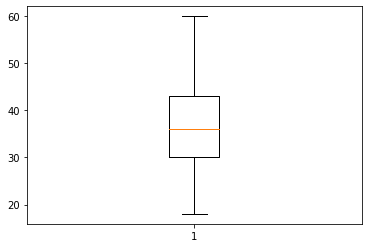

In [18]:
box_plot = Dataset.Age
plt.boxplot(box_plot)

{'boxes': [<matplotlib.lines.Line2D at 0x7feec0a6c198>],
 'caps': [<matplotlib.lines.Line2D at 0x7feec0a6cba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feec0a78668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feec0a782e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feec0a6c4a8>,
  <matplotlib.lines.Line2D at 0x7feec0a6c828>]}

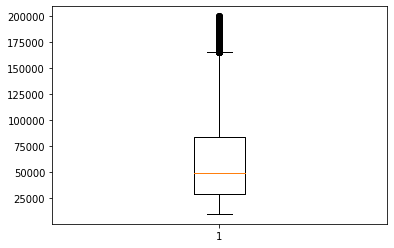

In [19]:
box_plot = Dataset.MonthlyIncome
plt.boxplot(box_plot)

{'boxes': [<matplotlib.lines.Line2D at 0x7feec09d0f28>],
 'caps': [<matplotlib.lines.Line2D at 0x7feec09dd978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feec09e7438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feec09e70b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feec09dd278>,
  <matplotlib.lines.Line2D at 0x7feec09dd5f8>]}

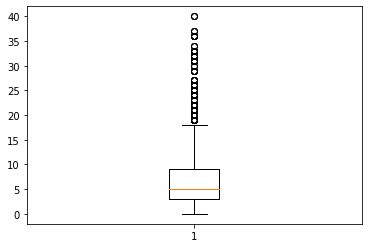

In [20]:
box_plot=Dataset.YearsAtCompany
plt.boxplot(box_plot)

{'boxes': [<matplotlib.lines.Line2D at 0x7feec09c9390>],
 'caps': [<matplotlib.lines.Line2D at 0x7feec09c9da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feec0957860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feec09574e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feec09c96a0>,
  <matplotlib.lines.Line2D at 0x7feec09c9a20>]}

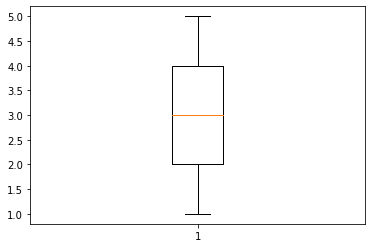

In [21]:
box_plot=Dataset.Education
plt.boxplot(box_plot)

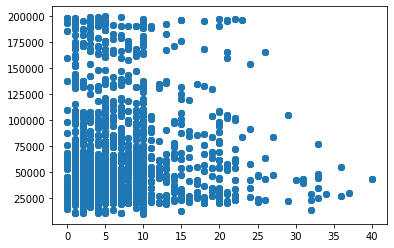

In [22]:
x_axis=Dataset.YearsAtCompany
y_axis=Dataset.MonthlyIncome
plt.scatter(x_axis,y_axis)

(array([1410., 1416.,  942.,  228.,  135.,  174.,   48.,   18.,   27.,
          12.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

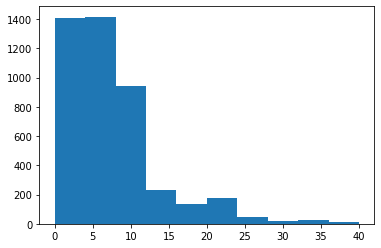

In [23]:
plt.hist(Dataset.YearsAtCompany)

In [24]:
Dataset6 =Dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()
Dataset6=Dataset6.T
print(Dataset6)

                          count          mean  ...      75%       max
Age                      4410.0     36.923810  ...     43.0      60.0
DistanceFromHome         4410.0      9.192517  ...     14.0      29.0
Education                4410.0      2.912925  ...      4.0       5.0
MonthlyIncome            4410.0  65029.312925  ...  83800.0  199990.0
NumCompaniesWorked       4391.0      2.694830  ...      4.0       9.0
PercentSalaryHike        4410.0     15.209524  ...     18.0      25.0
TotalWorkingYears        4401.0     11.279936  ...     15.0      40.0
TrainingTimesLastYear    4410.0      2.799320  ...      3.0       6.0
YearsAtCompany           4410.0      7.008163  ...      9.0      40.0
YearsSinceLastPromotion  4410.0      2.187755  ...      3.0      15.0
YearsWithCurrManager     4410.0      4.123129  ...      7.0      17.0

[11 rows x 8 columns]


In [25]:
Dataset7=Dataset6.drop(['count'],axis=1)
print(Dataset7)

                                 mean           std  ...      75%       max
Age                         36.923810      9.133301  ...     43.0      60.0
DistanceFromHome             9.192517      8.105026  ...     14.0      29.0
Education                    2.912925      1.023933  ...      4.0       5.0
MonthlyIncome            65029.312925  47068.888559  ...  83800.0  199990.0
NumCompaniesWorked           2.694830      2.498887  ...      4.0       9.0
PercentSalaryHike           15.209524      3.659108  ...     18.0      25.0
TotalWorkingYears           11.279936      7.782222  ...     15.0      40.0
TrainingTimesLastYear        2.799320      1.288978  ...      3.0       6.0
YearsAtCompany               7.008163      6.125135  ...      9.0      40.0
YearsSinceLastPromotion      2.187755      3.221699  ...      3.0      15.0
YearsWithCurrManager         4.123129      3.567327  ...      7.0      17.0

[11 rows x 7 columns]


In [26]:
writer = pd.ExcelWriter('general_data_out.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Dataset7.to_excel(writer, sheet_name='Output')

# Close the Pandas Excel writer and output the Excel file.
writer.save()